# SI671 Final Project Data Exploration

In [2]:
#import packages
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import sqf data files from 2017-2018 and clean data

In [5]:
#import 2017 data into pandas
sqf_17 = pd.read_excel('data/sqf-2017.xlsx')

In [8]:
#import 2018 data into pandas
sqf_18 = pd.read_excel('data/sqf-2018.xlsx')

In [10]:
sqf_17.shape, sqf_18.shape

((11629, 83), (11008, 83))

In [12]:
#combine both dataframes
sqf=sqf_17.append(sqf_18, ignore_index=True)

In [17]:
sqf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22637 entries, 0 to 22636
Data columns (total 84 columns):
BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG      22637 non-null object
BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                      22637 non-null object
DAY2                                                            22637 non-null object
DEMEANOR_CODE                                                   21571 non-null object
DEMEANOR_OF_PERSON_STOPPED                                      21484 non-null object
FIREARM_FLAG                                                    22637 non-null object
FRISKED_FLAG                                                    22637 non-null object
ID_CARD_IDENTIFIES_OFFICER_FLAG                                 22637 non-null object
ISSUING_OFFICER_COMMAND_CODE                                    22637 non-null int64
ISSUING_OFFICER_RANK                                            22637 non-null object
JURISDICTION_CODE               

#### Basic Data Stats

In [31]:
#how many times have people been searched in the data 
sqf['SEARCHED_FLAG'].value_counts()

N    15078
Y     7558
(        1
Name: SEARCHED_FLAG, dtype: int64

In [24]:
#how many times have people been frisked in the data 
sqf['FRISKED_FLAG'].value_counts()

Y    13561
N     9075
V        1
Name: FRISKED_FLAG, dtype: int64

In [25]:
#how many times have people been suspected with a firearm 
sqf['FIREARM_FLAG'].value_counts()

(null)    21981
Y           656
Name: FIREARM_FLAG, dtype: int64

In [34]:
#how many times have people been suspected with a knive cutter
sqf['KNIFE_CUTTER_FLAG'].value_counts()

(null)    21459
Y          1178
Name: KNIFE_CUTTER_FLAG, dtype: int64

In [33]:
#how many times have people been suspected with a "other" weapon 
sqf['OTHER_WEAPON_FLAG'].value_counts()

(null)    22338
Y           299
Name: OTHER_WEAPON_FLAG, dtype: int64

In [32]:
#how many times have people been suspected with a firearm 
sqf['WEAPON_FOUND_FLAG'].value_counts()

N    20622
Y     2001
(       14
Name: WEAPON_FOUND_FLAG, dtype: int64

In [29]:
#how may people were arrested 
sqf['SUSPECT_ARRESTED_FLAG'].value_counts() #SUSPECT_ARRESTED_OFFENSE for details

N    16061
Y     6576
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [30]:
#how may people were arrested 
sqf['SUMMONS_ISSUED_FLAG'].value_counts() #SUMMONS_OFFENSE_DESCRIPTION for details

N    21950
Y      686
(        1
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [35]:
#suspected crime description
sqf['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

CPW                                            6119
ROBBERY                                        3316
ASSAULT                                        2793
PETIT LARCENY                                  1865
BURGLARY                                       1672
CRIMINAL TRESPASS                              1441
OTHER                                           998
GRAND LARCENY                                   885
GRAND LARCENY AUTO                              750
CRIMINAL POSSESSION OF MARIHUANA                509
MENACING                                        412
CRIMINAL MISCHIEF                               395
CRIMINAL SALE OF CONTROLLED SUBSTANCE           203
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE     184
UNAUTHORIZED USE OF A VEHICLE                   175
CPSP                                            126
THEFT OF SERVICES                               119
AUTO STRIPPIG                                   110
RECKLESS ENDANGERMENT                           107
MAKING GRAFF

In [39]:
#actual arrest description
sqf['SUSPECT_ARREST_OFFENSE'].value_counts()

(null)                                         16059
CPW                                             1254
CRIMINAL TRESPASS                               1029
ROBBERY                                          835
PETIT LARCENY                                    657
ASSAULT                                          635
OTHER                                            481
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE      315
BURGLARY                                         227
GRAND LARCENY                                    226
CRIMINAL MISCHIEF                                153
MENACING                                         119
CRIMINAL POSSESSION OF MARIHUANA                 103
CPSP                                              94
UNAUTHORIZED USE OF A VEHICLE                     89
GRAND LARCENY AUTO                                69
CRIMINAL SALE OF CONTROLLED SUBSTANCE             66
THEFT OF SERVICES                                 47
CRIMINAL POSSESSION OF FORGED INSTRUMENT      

In [40]:
sqf['OFFICER_EXPLAINED_STOP_FLAG'].value_counts()

Y    22420
N      217
Name: OFFICER_EXPLAINED_STOP_FLAG, dtype: int64

In [41]:
sqf['SUPERVISING_OFFICER_RANK'].value_counts()

SGT    18439
LT      3371
SSA      501
LSA      115
POM       80
CPT       54
SDS       29
DI        16
POF       16
LCD       14
DTS        2
Name: SUPERVISING_OFFICER_RANK, dtype: int64

In [42]:
sqf['STOP_WAS_INITIATED'].value_counts()

Based on Radio Run         12941
Based on Self Initiated     6333
Based on C/W on Scene       3349
(null)                        13
                               1
Name: STOP_WAS_INITIATED, dtype: int64

In [28]:
#the demeanor of the person types
sqf['DEMEANOR_OF_PERSON_STOPPED'].value_counts().nunique()

74

In [36]:
#The code of the demenor ? Not sure what this is
sqf['DEMEANOR_CODE'].value_counts()

DE    14576
CM     6994
(n        1
Name: DEMEANOR_CODE, dtype: int64

In [43]:
sqf['SUSPECT_RACE_DESCRIPTION'].value_counts()

BLACK                             12836
WHITE HISPANIC                     4981
WHITE                              2051
BLACK HISPANIC                     1975
(null)                              335
ASIAN / PACIFIC ISLANDER            221
ASIAN/PAC.ISL                       206
AMERICAN INDIAN/ALASKAN NATIVE       16
AMER IND                              9
MALE                                  7
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

#### Objective 1: What is the correlation between location and being stopped?

In [44]:
df_loc=sqf[['STOP_LOCATION_BORO_NAME', 'FRISKED_FLAG', 'SEARCHED_FLAG']]

In [51]:
# Get names of indexes for which column Age has value 30
boro = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN IS', 'STATEN ISLAND']
 
# Delete these row indexes from dataFrame
new_df = df_loc[df_loc.STOP_LOCATION_BORO_NAME.isin(boro)]

#change add staten island
new_df['STOP_LOCATION_BORO_NAME'].replace('STATEN IS', 'STATEN ISLAND',inplace=True)

In [52]:
new_df.head()

,STOP_LOCATION_BORO_NAME,FRISKED_FLAG,SEARCHED_FLAG
0,MANHATTAN,N,N
1,MANHATTAN,N,N
2,MANHATTAN,N,N
3,MANHATTAN,Y,Y
4,MANHATTAN,N,N


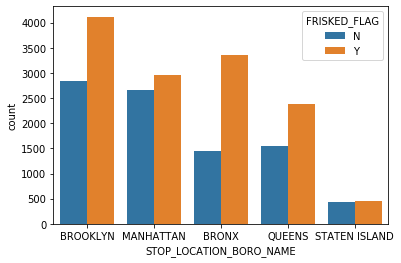

In [56]:
ax = sns.countplot(x='STOP_LOCATION_BORO_NAME', hue='FRISKED_FLAG', order = new_df['STOP_LOCATION_BORO_NAME'].value_counts().index, data=new_df)

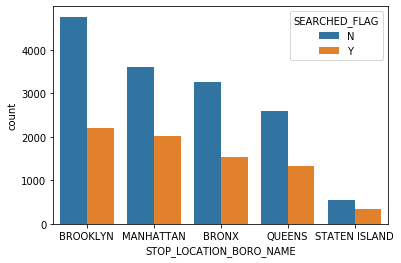

In [55]:
ax = sns.countplot(x='STOP_LOCATION_BORO_NAME', hue='SEARCHED_FLAG',order = new_df['STOP_LOCATION_BORO_NAME'].value_counts().index, data=new_df)

#### Objective 2: What is the likelihood of being frisked when already stopped?

In [57]:
#how many times have people been frisked in the data 
sqf['FRISKED_FLAG'].value_counts()

Y    13561
N     9075
V        1
Name: FRISKED_FLAG, dtype: int64

In [59]:
13561/(13561+9075+1)

0.5990634801431285

#### Objective 3: How does demographics play into the rate of being stopped and frisked?

In [61]:
df_dem=sqf[['FRISKED_FLAG', 'SEARCHED_FLAG', 'SUSPECT_BODY_BUILD_TYPE','SUSPECT_RACE_DESCRIPTION', 'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX' ]]

In [62]:
df_dem.head()

,FRISKED_FLAG,SEARCHED_FLAG,SUSPECT_BODY_BUILD_TYPE,SUSPECT_RACE_DESCRIPTION,SUSPECT_REPORTED_AGE,SUSPECT_SEX
0,N,N,THN,(null),39,MALE
1,N,N,MED,(null),37,MALE
2,N,N,THN,WHITE,(null),FEMALE
3,Y,Y,U,BLACK HISPANIC,31,MALE
4,N,N,THN,BLACK,(null),FEMALE


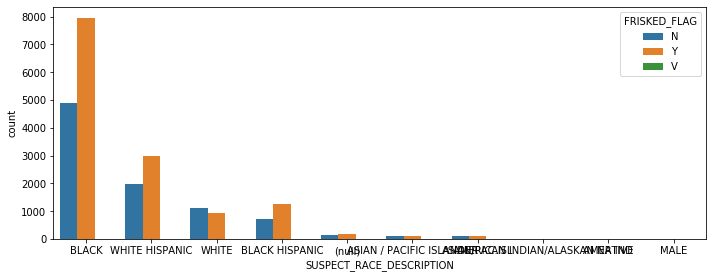

In [71]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 4.27)
sns.countplot(x='SUSPECT_RACE_DESCRIPTION', hue='FRISKED_FLAG', order = df_dem['SUSPECT_RACE_DESCRIPTION'].value_counts().index, data=df_dem)

#### Objective 4: What is the rate of finding illegal weapons and/or substances while being frisked?

#### Objective 5: Can we predict if a person is armed?

In [97]:
#create dataframe with desired features
df_pred=sqf[['FRISKED_FLAG', 'SEARCHED_FLAG','SUSPECT_RACE_DESCRIPTION', 'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECTED_CRIME_DESCRIPTION', 'WEAPON_FOUND_FLAG','FIREARM_FLAG', 'KNIFE_CUTTER_FLAG', 'OTHER_WEAPON_FLAG', 'ISSUING_OFFICER_RANK', 'STOP_WAS_INITIATED' , 'STOP_DURATION_MINUTES' ]]

In [98]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22637 entries, 0 to 22636
Data columns (total 13 columns):
FRISKED_FLAG                   22637 non-null object
SEARCHED_FLAG                  22637 non-null object
SUSPECT_RACE_DESCRIPTION       22637 non-null object
SUSPECT_REPORTED_AGE           22637 non-null object
SUSPECT_SEX                    22637 non-null object
SUSPECTED_CRIME_DESCRIPTION    22637 non-null object
WEAPON_FOUND_FLAG              22637 non-null object
FIREARM_FLAG                   22637 non-null object
KNIFE_CUTTER_FLAG              22637 non-null object
OTHER_WEAPON_FLAG              22637 non-null object
ISSUING_OFFICER_RANK           22637 non-null object
STOP_WAS_INITIATED             22637 non-null object
STOP_DURATION_MINUTES          22637 non-null int64
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [101]:
df_pred.head()

,FRISKED_FLAG,SEARCHED_FLAG,SUSPECT_RACE_DESCRIPTION,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECTED_CRIME_DESCRIPTION,WEAPON_FOUND_FLAG,FIREARM_FLAG,KNIFE_CUTTER_FLAG,OTHER_WEAPON_FLAG,ISSUING_OFFICER_RANK,STOP_WAS_INITIATED,STOP_DURATION_MINUTES,crime,race
0,N,N,(null),39,MALE,TERRORISM,N,(null),(null),(null),SGT,Based on Self Initiated,90,27,0
1,N,N,(null),37,MALE,TERRORISM,N,(null),(null),(null),SGT,Based on Self Initiated,90,27,0
2,N,N,WHITE,(null),FEMALE,OTHER,N,(null),(null),(null),POM,Based on C/W on Scene,40,21,8
3,Y,Y,BLACK HISPANIC,31,MALE,GRAND LARCENY AUTO,N,(null),(null),(null),POM,Based on Self Initiated,40,15,6
4,N,N,BLACK,(null),FEMALE,BURGLARY,N,(null),(null),(null),POM,Based on Radio Run,60,2,5


In [83]:
df_pred['SUSPECT_RACE_DESCRIPTION']=df_pred['SUSPECT_RACE_DESCRIPTION'].astype(str)

In [100]:
df_pred['SUSPECT_RACE_DESCRIPTION'] = df_pred['SUSPECT_RACE_DESCRIPTION'].astype('category')
df_pred['race'] = df_pred['SUSPECT_RACE_DESCRIPTION'].cat.codes

In [99]:
df_pred['SUSPECTED_CRIME_DESCRIPTION'] = df_pred['SUSPECTED_CRIME_DESCRIPTION'].astype('category')
df_pred['crime'] = df_pred['SUSPECTED_CRIME_DESCRIPTION'].cat.codes

In [ ]:
df_pred['SUSPECTED_CRIME_DESCRIPTION'] = df_pred['SUSPECTED_CRIME_DESCRIPTION'].astype('category')
df_pred['crime'] = df_pred['SUSPECTED_CRIME_DESCRIPTION'].cat.codes

In [1]:
df_pred.dtypes

NameError: name 'df_pred' is not defined

In [ ]:
#function to change dataframe into working format for machine learning 

def mod_df(df):
    #null to none in race
    obj_df["body_style"] = obj_df["body_style"].astype('category')
    return df


In [ ]:
#create test train spilt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all[['sale_rank']],df_all['connection'].astype(int),stratify=df_all['connection'].astype(int),random_state=0)